In [77]:
###Data_Transformation

check if there are highly correlated features and drop them (if there are any).
One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).
for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

In [47]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
Customer_Analysis = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
Customer_Analysis.columns

Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'month', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [78]:
numerical = Customer_Analysis.select_dtypes(include = np.number)

categorical = Customer_Analysis.select_dtypes(include = object) 


In [79]:
corr_matrix = numerical.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
numerical = numerical.drop(numerical.columns[to_drop], axis=1)


In [80]:
categorical.head(5)

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,2,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize


In [16]:
one_hot = pd.get_dummies(categorical['region'])


In [17]:
one_hot

,central,east,north west,west region
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
10684,1,0,0,0
10685,0,0,1,0
10686,1,0,0,0
10687,0,0,0,1


In [27]:
dummy_columns = ['response', 'employment_status', 'gender','location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel']

In [28]:
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(categorical[dummy_columns])

In [29]:
encoded_df = pd.DataFrame(encoded_features.toarray())

In [31]:
df_encoded = pd.concat([categorical, encoded_df], axis=1)

In [33]:
df_encoded = df_encoded.drop(columns=dummy_columns)

In [34]:
df_encoded

,region,coverage,education,effective_to_date,month,vehicle_class,vehicle_size,0,1,2,...,25,26,27,28,29,30,31,32,33,34
0,central,basic,college,2/18/11,feb,four-door car,medsize,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,west region,basic,college,1/18/11,jan,four-door car,medsize,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,east,basic,bachelor,2/10/11,feb,suv,medsize,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,north west,extended,college,1/11/11,jan,four-door car,medsize,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,north west,premium,bachelor,1/17/11,jan,four-door car,medsize,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,premium,bachelor,1/19/11,jan,luxury car,medsize,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
10685,north west,basic,college,1/6/11,jan,four-door car,medsize,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10686,central,extended,bachelor,2/6/11,feb,luxury suv,medsize,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10687,west region,premium,college,2/13/11,feb,suv,medsize,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
Label_coding = {"Basic":1, "extended":2, "Premium":3}
Customer_Analysis["coverage"] = Customer_Analysis["coverage"].replace(Label_coding)
    

In [25]:
Customer_Analysis["coverage"] 

0          basic
1          basic
2          basic
3              2
4        premium
          ...   
10684    premium
10685      basic
10686          2
10687    premium
10688      basic
Name: coverage, Length: 10689, dtype: object

In [37]:
label_columns = ['region', 'education', 'vehicle_class', 'vehicle_size']
le = LabelEncoder()
categorical[label_columns] = categorical[label_columns].apply(le.fit_transform)



In [38]:
categorical[label_columns]

,region,education,vehicle_class,vehicle_size
0,0,1,0,1
1,3,1,0,1
2,1,0,4,1
3,2,1,0,1
4,2,0,0,1
...,...,...,...,...
10684,0,0,1,1
10685,2,1,0,1
10686,0,0,2,1
10687,3,1,4,1


Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.

varA
Use minmax transform to bring varA's values into the range [0,1].
Check that varA has been rescaled using a displot or a histogram

In [44]:
VarA = numerical['income']
min_value = VarA.min()
max_value = VarA.max()

VarA_transformed = (VarA - min_value) / (max_value - min_value)


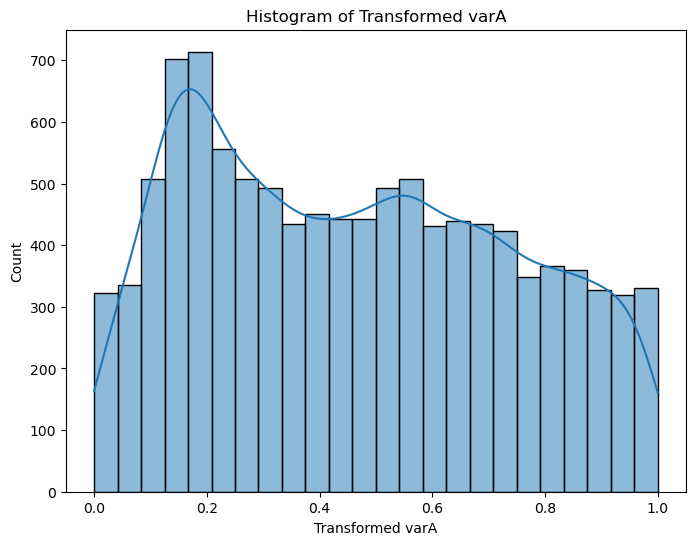

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(VarA_transformed, kde=True)
plt.xlabel('Transformed varA')
plt.ylabel('Count')
plt.title('Histogram of Transformed varA')
plt.show()

In [82]:
#using MinMaxScaler for changing the scale
columns_to_scale = ['income'] 
data_to_scale = numerical[columns_to_scale]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

,income
0,0.422396
1,0.914158
2,0.134550
3,0.434059
4,0.151628
...,...
10684,0.572623
10685,0.568231
10686,0.331317
10687,0.602130


In [69]:
customer_lifetime_value = 'varB'
VarB = numerical['customer_lifetime_value']

In [75]:
from scipy.stats import skew
print(skew(VarB, axis=0, bias=True))

3.0146522729298377


In [39]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


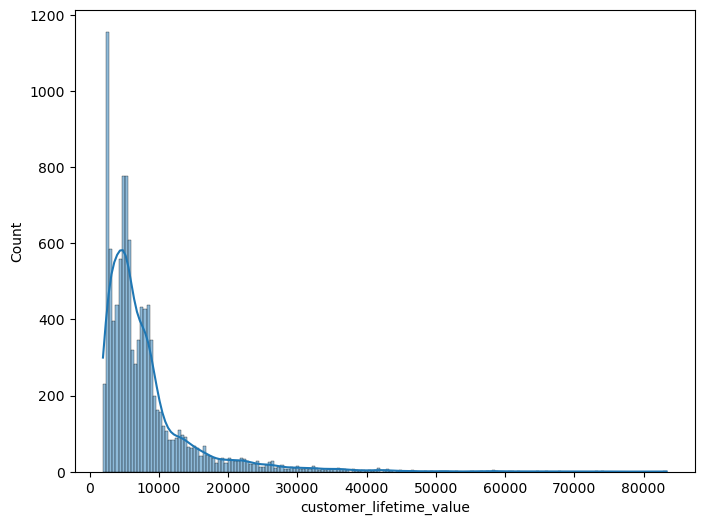

In [72]:
# Visualize the original distribution of varB
plt.figure(figsize=(8, 6))
sns.histplot(VarB, kde=True)
plt.show()

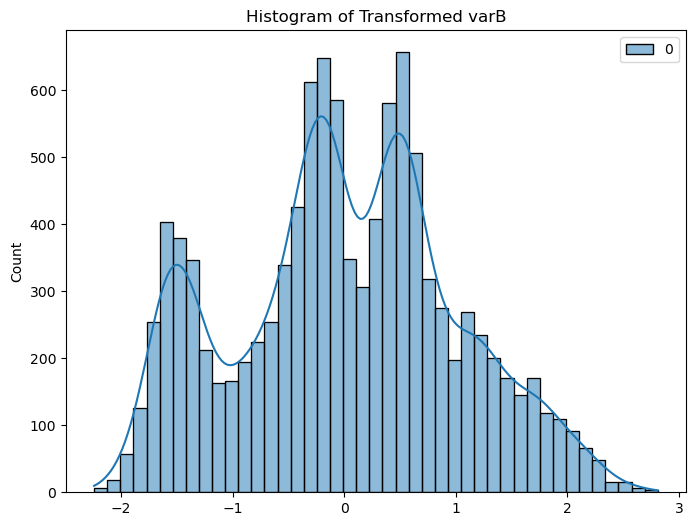

In [73]:
# power transformation to reduce skewness and standardize varB
pt = PowerTransformer(method='yeo-johnson')
varB_transformed = pt.fit_transform(VarB.to_numpy().reshape(-1, 1))

# Visualize the transformed distribution of varB
plt.figure(figsize=(8, 6))
sns.histplot(varB_transformed, kde=True)
plt.title('Histogram of Transformed varB')
plt.show()

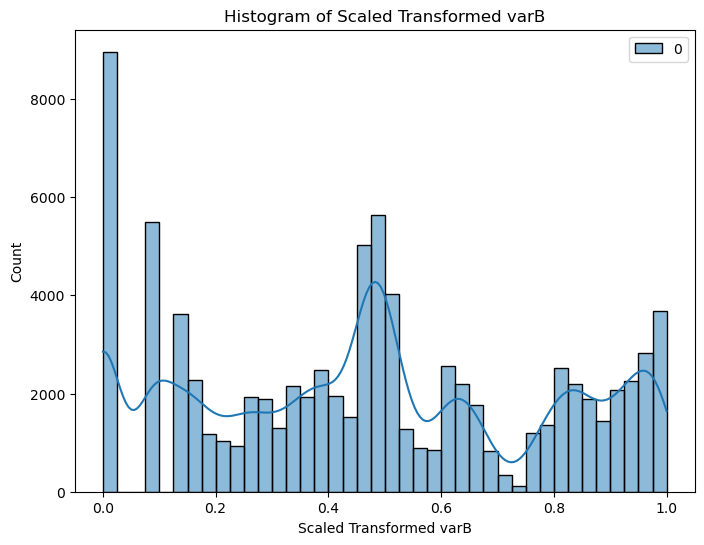

In [62]:
# MinMaxScaling on the transformed varB
scaler = MinMaxScaler()
varB_scaled = scaler.fit_transform(varB_transformed)

# Visualize the scaled varB
plt.figure(figsize=(8, 6))
sns.histplot(varB_scaled, kde=True)
plt.xlabel('Scaled Transformed varB')
plt.ylabel('Count')
plt.title('Histogram of Scaled Transformed varB')
plt.show()
